In [1]:
import torch

### Basic Operations

In [13]:
b = torch.rand(3,3)

In [9]:
torch.cuda.is_available()

False

In [10]:
torch.empty(5)

tensor([ 2.3236e-36,  0.0000e+00, -1.8554e+10,  4.5580e-41,  8.9683e-44])

In [18]:
b.shape[0]

3

In [19]:
x = torch.rand(2,2)
y = torch.rand(2,2)

In [20]:
print(x)
print(y)

tensor([[0.1367, 0.6263],
        [0.9419, 0.3963]])
tensor([[0.5600, 0.2104],
        [0.7596, 0.1873]])


In [21]:
z = x+y

In [22]:
print(z)

tensor([[0.6967, 0.8367],
        [1.7015, 0.5836]])


In [23]:
x.add_(y)
print(x)

tensor([[0.6967, 0.8367],
        [1.7015, 0.5836]])


In [24]:
x = torch.rand(5,3)

In [30]:
x

tensor([[0.9187, 0.5063, 0.3060],
        [0.6593, 0.5745, 0.0544],
        [0.9191, 0.3275, 0.7650],
        [0.6989, 0.1062, 0.4642],
        [0.6631, 0.9661, 0.8487]])

In [32]:
y = x.view(3,-1)

In [33]:
y

tensor([[0.9187, 0.5063, 0.3060, 0.6593, 0.5745],
        [0.0544, 0.9191, 0.3275, 0.7650, 0.6989],
        [0.1062, 0.4642, 0.6631, 0.9661, 0.8487]])

In [34]:
import numpy as np

In [39]:
a = torch.zeros((2,3))

In [40]:
b = a[:,1]
a[1,1] = 5
print(a)
print(b)

tensor([[0., 0., 0.],
        [0., 5., 0.]])
tensor([0., 5.])


In [41]:
b = a.numpy()

In [42]:
b = torch.from_numpy(b)

In [43]:
b = a.numpy()

In [45]:
a+=1

In [46]:
print(a)
print(b)

tensor([[1., 1., 1.],
        [1., 6., 1.]])
[[1. 1. 1.]
 [1. 6. 1.]]


In [50]:
a = torch.rand(3,3, requires_grad=True)

In [51]:
a

tensor([[0.0555, 0.9031, 0.9985],
        [0.4294, 0.2303, 0.9579],
        [0.9283, 0.2261, 0.1962]], requires_grad=True)

### Autograd

In [73]:
a = torch.rand(3,3, requires_grad=True)
b = a+2

In [64]:
b

tensor([[2.2467, 2.6212, 2.4623],
        [2.2402, 2.0733, 2.6827],
        [2.3128, 2.8487, 2.6458]], grad_fn=<AddBackward0>)

In [65]:
c = b*(b+2)
print(c)

tensor([[ 9.5413, 12.1132, 10.9873],
        [ 9.4986,  8.4455, 12.5621],
        [ 9.9744, 13.8129, 12.2920]], grad_fn=<MulBackward0>)


In [66]:
print(b.mean())

tensor(2.4593, grad_fn=<MeanBackward0>)


In [67]:
print(a)
print(a.grad)

tensor([[0.2467, 0.6212, 0.4623],
        [0.2402, 0.0733, 0.6827],
        [0.3128, 0.8487, 0.6458]], requires_grad=True)
None


In [69]:
c.sum().backward()

In [71]:
print(a.grad)

tensor([[6.4935, 7.2424, 6.9245],
        [6.4803, 6.1467, 7.3654],
        [6.6255, 7.6975, 7.2916]])


In [74]:
b.sum().backward()
print(a.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [76]:
a.requires_grad_(False)
#b.requires_grad_(False)

tensor([[0.3553, 0.4161, 0.6694],
        [0.5706, 0.2688, 0.2390],
        [0.5648, 0.1770, 0.6837]])

In [77]:
a = torch.rand(2,2, requires_grad=True)

with torch.no_grad():
    b = a+2

In [79]:
print(a)

tensor([[0.5026, 0.8944],
        [0.5273, 0.5790]], requires_grad=True)


In [81]:
weights = torch.ones(2,2,requires_grad=True)
for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)

tensor([[3., 3.],
        [3., 3.]])
tensor([[6., 6.],
        [6., 6.]])


In [82]:
weights = torch.ones(2,2,requires_grad=True)
for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_()

tensor([[3., 3.],
        [3., 3.]])
tensor([[3., 3.],
        [3., 3.]])


### Backprop

In [2]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

In [3]:
w = torch.tensor(1.0, requires_grad=True)
#forward pass
y1 = w*x
loss = (y1-y)**2

In [4]:
loss

tensor(1., grad_fn=<PowBackward0>)

In [5]:
loss.backward()

In [6]:
w.grad

tensor(-2.)

### Gradient descent

In [13]:
import numpy as np

In [14]:
X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)
w = 0.0

In [15]:
def forward(x):
    return w*x

def loss(y, y_pred):
    return ((y-y_pred)**2).mean()

def gradient(x, y,y_pred):
    return np.dot(2*x,y_pred-y).mean()

print(f'pred  before training {forward(5)}')

n_iter = 10
lr     = 0.01
for epoch in range(n_iter):
    y_pred = forward(X)
    l   = loss(Y, y_pred)
    dw     = gradient(X, Y, y_pred)
    w     -= lr*dw
    print(f'epoch {epoch+1} w =  {w:.3f} loss = {l:.8f}')

pred  before training 0.0
epoch 1 w =  1.200 loss = 30.00000000
epoch 2 w =  1.680 loss = 4.79999924
epoch 3 w =  1.872 loss = 0.76800019
epoch 4 w =  1.949 loss = 0.12288000
epoch 5 w =  1.980 loss = 0.01966083
epoch 6 w =  1.992 loss = 0.00314574
epoch 7 w =  1.997 loss = 0.00050331
epoch 8 w =  1.999 loss = 0.00008053
epoch 9 w =  1.999 loss = 0.00001288
epoch 10 w =  2.000 loss = 0.00000206


In [16]:
print(f'prediction {forward(5)}')

prediction 9.998951268196105


In [21]:
X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)

In [22]:
def forward(x):
    return w*x

def loss(y, y_pred):
    return ((y-y_pred)**2).mean()


print(f'pred  before training {forward(5)}')

n_iter = 100
lr     = 0.01
for epoch in range(n_iter):
    y_pred = forward(X)
    l   = loss(Y, y_pred)
    l.backward()
    #dw     = gradient(X, Y, y_pred)
    with torch.no_grad():
        w     -= lr*w.grad
    w.grad.zero_()
    print(f'epoch {epoch+1} w =  {w:.3f} loss = {l:.8f}')
print(f'prediction {forward(5)}')

pred  before training 0.0
epoch 1 w =  0.300 loss = 30.00000000
epoch 2 w =  0.555 loss = 21.67499924
epoch 3 w =  0.772 loss = 15.66018772
epoch 4 w =  0.956 loss = 11.31448650
epoch 5 w =  1.113 loss = 8.17471695
epoch 6 w =  1.246 loss = 5.90623236
epoch 7 w =  1.359 loss = 4.26725292
epoch 8 w =  1.455 loss = 3.08308983
epoch 9 w =  1.537 loss = 2.22753215
epoch 10 w =  1.606 loss = 1.60939169
epoch 11 w =  1.665 loss = 1.16278565
epoch 12 w =  1.716 loss = 0.84011245
epoch 13 w =  1.758 loss = 0.60698116
epoch 14 w =  1.794 loss = 0.43854395
epoch 15 w =  1.825 loss = 0.31684780
epoch 16 w =  1.851 loss = 0.22892261
epoch 17 w =  1.874 loss = 0.16539653
epoch 18 w =  1.893 loss = 0.11949898
epoch 19 w =  1.909 loss = 0.08633806
epoch 20 w =  1.922 loss = 0.06237914
epoch 21 w =  1.934 loss = 0.04506890
epoch 22 w =  1.944 loss = 0.03256231
epoch 23 w =  1.952 loss = 0.02352631
epoch 24 w =  1.960 loss = 0.01699772
epoch 25 w =  1.966 loss = 0.01228084
epoch 26 w =  1.971 loss = 0.

### Training Pipeline

In [23]:
import torch.nn as nn


X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)


def forward(x):
    return w*x



print(f'pred  before training {forward(5)}')

loss      = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=lr) 

n_iter = 100
lr     = 0.01
for epoch in range(n_iter):
    y_pred = forward(X)
    l   = loss(Y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'epoch {epoch+1} w =  {w:.3f} loss = {l:.8f}')
print(f'prediction {forward(5)}')


pred  before training 0.0
epoch 1 w =  0.300 loss = 30.00000000
epoch 2 w =  0.555 loss = 21.67499924
epoch 3 w =  0.772 loss = 15.66018772
epoch 4 w =  0.956 loss = 11.31448650
epoch 5 w =  1.113 loss = 8.17471695
epoch 6 w =  1.246 loss = 5.90623236
epoch 7 w =  1.359 loss = 4.26725292
epoch 8 w =  1.455 loss = 3.08308983
epoch 9 w =  1.537 loss = 2.22753215
epoch 10 w =  1.606 loss = 1.60939169
epoch 11 w =  1.665 loss = 1.16278565
epoch 12 w =  1.716 loss = 0.84011245
epoch 13 w =  1.758 loss = 0.60698116
epoch 14 w =  1.794 loss = 0.43854395
epoch 15 w =  1.825 loss = 0.31684780
epoch 16 w =  1.851 loss = 0.22892261
epoch 17 w =  1.874 loss = 0.16539653
epoch 18 w =  1.893 loss = 0.11949898
epoch 19 w =  1.909 loss = 0.08633806
epoch 20 w =  1.922 loss = 0.06237914
epoch 21 w =  1.934 loss = 0.04506890
epoch 22 w =  1.944 loss = 0.03256231
epoch 23 w =  1.952 loss = 0.02352631
epoch 24 w =  1.960 loss = 0.01699772
epoch 25 w =  1.966 loss = 0.01228084
epoch 26 w =  1.971 loss = 0.

In [29]:
import torch.nn as nn


X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
#w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)

print(n_samples, n_features)

n_samples, n_features = X.shape

input_size  = n_features
output_size = n_features  

model = nn.Linear(input_size, output_size)

X_test = torch.tensor([5], dtype = torch.float32)

print(f'pred  before training {model(X_test).item()}')

loss      = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr) 

n_iter = 100
lr     = 0.01
for epoch in range(n_iter):
    y_pred = model(X)
    l   = loss(Y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    [w,b] = model.parameters()
    print(f'epoch {epoch+1} w =  {w[0][0].item():.3f}  loss = {l:.8f}')
print(f'prediction {model(X_test).item()}')


4 1
pred  before training 0.07626056671142578
epoch 1 w =  0.184  loss = 27.32563019
epoch 2 w =  0.423  loss = 19.02868843
epoch 3 w =  0.622  loss = 13.27121162
epoch 4 w =  0.787  loss = 9.27581596
epoch 5 w =  0.926  loss = 6.50309324
epoch 6 w =  1.041  loss = 4.57876015
epoch 7 w =  1.137  loss = 3.24310994
epoch 8 w =  1.218  loss = 2.31593561
epoch 9 w =  1.285  loss = 1.67219639
epoch 10 w =  1.341  loss = 1.22512913
epoch 11 w =  1.388  loss = 0.91453147
epoch 12 w =  1.427  loss = 0.69862944
epoch 13 w =  1.460  loss = 0.54843611
epoch 14 w =  1.488  loss = 0.44383949
epoch 15 w =  1.511  loss = 0.37088379
epoch 16 w =  1.531  loss = 0.31988528
epoch 17 w =  1.547  loss = 0.28412426
epoch 18 w =  1.561  loss = 0.25893918
epoch 19 w =  1.573  loss = 0.24109422
epoch 20 w =  1.583  loss = 0.22834471
epoch 21 w =  1.591  loss = 0.21913297
epoch 22 w =  1.598  loss = 0.21237820
epoch 23 w =  1.605  loss = 0.20733073
epoch 24 w =  1.610  loss = 0.20346981
epoch 25 w =  1.615  los

In [30]:
import torch.nn as nn


X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
#w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)

print(n_samples, n_features)

n_samples, n_features = X.shape

input_size  = n_features
output_size = n_features  


class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

X_test = torch.tensor([5], dtype = torch.float32)

print(f'pred  before training {model(X_test).item()}')

loss      = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr) 

n_iter = 100
lr     = 0.01
for epoch in range(n_iter):
    y_pred = model(X)
    l   = loss(Y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    [w,b] = model.parameters()
    print(f'epoch {epoch+1} w =  {w[0][0].item():.3f}  loss = {l:.8f}')
print(f'prediction {model(X_test).item()}')


4 1
pred  before training -0.11693739891052246
epoch 1 w =  0.271  loss = 30.53306580
epoch 2 w =  0.523  loss = 21.20793724
epoch 3 w =  0.733  loss = 14.73729992
epoch 4 w =  0.908  loss = 10.24733543
epoch 5 w =  1.054  loss = 7.13171291
epoch 6 w =  1.176  loss = 4.96972179
epoch 7 w =  1.278  loss = 3.46943521
epoch 8 w =  1.362  loss = 2.42829227
epoch 9 w =  1.433  loss = 1.70573962
epoch 10 w =  1.492  loss = 1.20425141
epoch 11 w =  1.541  loss = 0.85615593
epoch 12 w =  1.582  loss = 0.61449754
epoch 13 w =  1.617  loss = 0.44669309
epoch 14 w =  1.645  loss = 0.33013627
epoch 15 w =  1.669  loss = 0.24913892
epoch 16 w =  1.690  loss = 0.19281664
epoch 17 w =  1.706  loss = 0.15361673
epoch 18 w =  1.721  loss = 0.12629804
epoch 19 w =  1.732  loss = 0.10722433
epoch 20 w =  1.743  loss = 0.09387249
epoch 21 w =  1.751  loss = 0.08449142
epoch 22 w =  1.758  loss = 0.07786642
epoch 23 w =  1.764  loss = 0.07315443
epoch 24 w =  1.769  loss = 0.06977061
epoch 25 w =  1.774  l

### Linear Regression

In [35]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [37]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [41]:
y = y.view(y.shape[0],1)

In [42]:
n_samples, n_features = X.shape

epoch:10, loss: 4286.5962
epoch:20, loss: 3202.4099
epoch:30, loss: 2417.2410
epoch:40, loss: 1848.0507
epoch:50, loss: 1435.0472
epoch:60, loss: 1135.1167
epoch:70, loss: 917.1295
epoch:80, loss: 758.5838
epoch:90, loss: 643.1937
epoch:100, loss: 559.1614


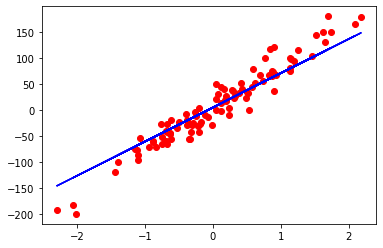

In [45]:
input_size  = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


num_epoch = 100
for epoch in range(num_epoch):
    y_pred = model(X)
    loss   = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if((epoch+1)%10==0):
        print(f'epoch:{epoch+1}, loss: {loss:.4f}')
        
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


### Logistic Regression

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



bc  = datasets.load_breast_cancer()

X,y = bc.data, bc.target

n_samples, n_features            = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)


X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))


In [48]:
y_train = y_train.view(y_train.shape[0],1)
y_test  = y_test.view(y_test.shape[0],1)

In [54]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    
model     = LogisticRegression(n_features)
criterion = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


n_epochs = 100

for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss   = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if((epoch+1)%10==0):
        print(f'epoch:{epoch+1}, loss: {loss:.4f}')
 




epoch:10, loss: 0.6005
epoch:20, loss: 0.4922
epoch:30, loss: 0.4222
epoch:40, loss: 0.3736
epoch:50, loss: 0.3379
epoch:60, loss: 0.3105
epoch:70, loss: 0.2888
epoch:80, loss: 0.2710
epoch:90, loss: 0.2563
epoch:100, loss: 0.2437


In [55]:
with torch.no_grad():
    y_pred = model(X_test)
    y_predicted_cls = y_pred.round()
    acc  = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
    print(f'accuracy {acc:.4f}')
    

accuracy 0.9298


### Pytorch dataset and data loader 

In [58]:
import torchvision
from torch.utils.data import Dataset, DataLoader
import math

class WineDataset(Dataset):
    def __init__(self):
        xy = np.loadtxt('wine.csv', delimiter = ",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])
        self.n_samples = xy.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples
    
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
        

In [59]:
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [60]:
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

In [61]:
for i in range(4):
    print(dataset[0])

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]), tensor([1.]))
(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]), tensor([1.]))
(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]), tensor([1.]))
(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]), tensor([1.]))


In [62]:
dataiter         = iter(dataloader)
data             = dataiter.next()
features, labels = data
print(features, labels)

tensor([[1.3880e+01, 1.8900e+00, 2.5900e+00, 1.5000e+01, 1.0100e+02, 3.2500e+00,
         3.5600e+00, 1.7000e-01, 1.7000e+00, 5.4300e+00, 8.8000e-01, 3.5600e+00,
         1.0950e+03],
        [1.2250e+01, 3.8800e+00, 2.2000e+00, 1.8500e+01, 1.1200e+02, 1.3800e+00,
         7.8000e-01, 2.9000e-01, 1.1400e+00, 8.2100e+00, 6.5000e-01, 2.0000e+00,
         8.5500e+02],
        [1.2220e+01, 1.2900e+00, 1.9400e+00, 1.9000e+01, 9.2000e+01, 2.3600e+00,
         2.0400e+00, 3.9000e-01, 2.0800e+00, 2.7000e+00, 8.6000e-01, 3.0200e+00,
         3.1200e+02],
        [1.3830e+01, 1.6500e+00, 2.6000e+00, 1.7200e+01, 9.4000e+01, 2.4500e+00,
         2.9900e+00, 2.2000e-01, 2.2900e+00, 5.6000e+00, 1.2400e+00, 3.3700e+00,
         1.2650e+03]]) tensor([[1.],
        [3.],
        [2.],
        [1.]])


In [63]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

print(total_samples, n_iterations)


178 45


In [64]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if((i+1)%5==0):
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations} inputs {inputs.shape}')
    

epoch 1/2, step 5/45 inputs torch.Size([4, 13])
epoch 1/2, step 10/45 inputs torch.Size([4, 13])
epoch 1/2, step 15/45 inputs torch.Size([4, 13])
epoch 1/2, step 20/45 inputs torch.Size([4, 13])
epoch 1/2, step 25/45 inputs torch.Size([4, 13])
epoch 1/2, step 30/45 inputs torch.Size([4, 13])
epoch 1/2, step 35/45 inputs torch.Size([4, 13])
epoch 1/2, step 40/45 inputs torch.Size([4, 13])
epoch 1/2, step 45/45 inputs torch.Size([2, 13])
epoch 2/2, step 5/45 inputs torch.Size([4, 13])
epoch 2/2, step 10/45 inputs torch.Size([4, 13])
epoch 2/2, step 15/45 inputs torch.Size([4, 13])
epoch 2/2, step 20/45 inputs torch.Size([4, 13])
epoch 2/2, step 25/45 inputs torch.Size([4, 13])
epoch 2/2, step 30/45 inputs torch.Size([4, 13])
epoch 2/2, step 35/45 inputs torch.Size([4, 13])
epoch 2/2, step 40/45 inputs torch.Size([4, 13])
epoch 2/2, step 45/45 inputs torch.Size([2, 13])


In [3]:
import torch
import torchvision

dataset = torchvision.datasets.MNIST(root = "./data", transform=torchvision.transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/home/anirudh/ml/my_env/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [12]:
import torchvision
from torch.utils.data import Dataset, DataLoader
import math
import numpy as np

class WineDataset(Dataset):
    def __init__(self, transform=None):
        xy = np.loadtxt('wine.csv', delimiter = ",", dtype=np.float32, skiprows=1)
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
        self.n_samples = xy.shape[0]
        
        self.transform = transform
    
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if(self.transform):
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.n_samples
    

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    

class MulTransform:
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target
    
    
    
dataset = WineDataset(transform = None)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features)

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset  = WineDataset(transform = composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features)
        

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])


### Softmax and Crossentropy

In [14]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0)
x = np.array([2.0, 1.0, 0.1])
print(softmax(x))

[0.65900114 0.24243297 0.09856589]


In [19]:
def cross_entropy(actual, predicted):
    return -np.sum(actual*np.log(predicted))

Y = np.array([1,0,0])
y_pred_good = np.array([0.7, 0.2, 0.1])
y_pred_bad  = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y, y_pred_good)
l2 = cross_entropy(Y, y_pred_bad)

print(f'loss1 numpy {l1:.4f}')
print(f'loss2 numpy {l2:.4f}')

loss1 numpy 0.3567
loss2 numpy 2.3026


In [22]:
import torch.nn as nn

loss = nn.CrossEntropyLoss()
Y    = torch.tensor([0]) #class name
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) #no softmax
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])  #no softmax

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad,  Y)

print(l1.item())
print(l2.item())
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print( predictions1, predictions2)

0.4170299470424652
1.840616226196289
tensor([0]) tensor([1])


### Feedforward nn

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 28*28
hidden_size = 100
num_classes = 10
num_epochs  = 2
batch_size  = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform = transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform = transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)



/home/anirudh/ml/my_env/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([100, 1, 28, 28]) torch.Size([100])


In [7]:
# for i in range(6):
#     plt.subplot(2,3, i+1)
#     plt.imshow(samples[i][0], cmap='gray')
# # plt.show()


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss    = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if((i+1)%100 == 0):
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples +=labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100.0* n_correct /n_samples
    print(f'accuracy = {acc}')
    
        

epoch 1/2, step 100/600, loss = 0.3994
epoch 1/2, step 200/600, loss = 0.2980
epoch 1/2, step 300/600, loss = 0.2957
epoch 1/2, step 400/600, loss = 0.2550
epoch 1/2, step 500/600, loss = 0.1520
epoch 1/2, step 600/600, loss = 0.2070
epoch 2/2, step 100/600, loss = 0.1090
epoch 2/2, step 200/600, loss = 0.2143
epoch 2/2, step 300/600, loss = 0.1928
epoch 2/2, step 400/600, loss = 0.2059
epoch 2/2, step 500/600, loss = 0.1619
epoch 2/2, step 600/600, loss = 0.0602
accuracy = 95.37


### CNN

Files already downloaded and verified
Files already downloaded and verified


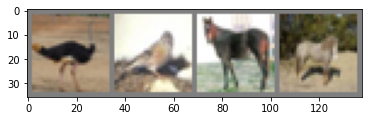

Epoch [1/5], Step [2000/12500], Loss: 2.2839
Epoch [1/5], Step [4000/12500], Loss: 2.2773
Epoch [1/5], Step [6000/12500], Loss: 2.2827
Epoch [1/5], Step [8000/12500], Loss: 2.2593
Epoch [1/5], Step [10000/12500], Loss: 2.0608
Epoch [1/5], Step [12000/12500], Loss: 1.7202
Epoch [2/5], Step [2000/12500], Loss: 2.5459
Epoch [2/5], Step [4000/12500], Loss: 1.6835
Epoch [2/5], Step [6000/12500], Loss: 1.5357
Epoch [2/5], Step [8000/12500], Loss: 2.2192
Epoch [2/5], Step [10000/12500], Loss: 1.9737
Epoch [2/5], Step [12000/12500], Loss: 1.5188
Epoch [3/5], Step [2000/12500], Loss: 1.8820
Epoch [3/5], Step [4000/12500], Loss: 1.0353
Epoch [3/5], Step [6000/12500], Loss: 1.9761
Epoch [3/5], Step [8000/12500], Loss: 1.2276
Epoch [3/5], Step [10000/12500], Loss: 1.2666
Epoch [3/5], Step [12000/12500], Loss: 1.5842
Epoch [4/5], Step [2000/12500], Loss: 1.2638
Epoch [4/5], Step [4000/12500], Loss: 1.0517
Epoch [4/5], Step [6000/12500], Loss: 1.4958
Epoch [4/5], Step [8000/12500], Loss: 1.8580
Epoc

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


### Transfer learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)


### Tensorboard Tutorial

In [11]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import torch.nn.functional as F
import sys


writer = SummaryWriter("runs/mnist")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 28*28
hidden_size = 100
num_classes = 10
num_epochs  = 2
batch_size  = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform = transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform = transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)


img_grid = torchvision.utils.make_grid(samples)
writer.add_image("mnist_images", img_grid)
writer.close()
#sys.exit()



class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
writer.add_graph(model, samples.reshape(-1,28*28))
writer.close()
#sys.exit()

running_loss = 0.0
running_correct = 0




for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss    = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss     = loss.item()
        _, predictions = torch.max(outputs, 1)
        running_correct += (predictions == labels).sum().item() 
        
        if((i+1)%100 == 0):
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            writer.add_scalar('training_loss ',running_loss/100, epoch*n_total_steps+i)
            writer.add_scalar('accuracy ',running_correct/100, epoch*n_total_steps+i)
            running_loss = 0.0
            running_correct = 0

            
labels = []
preds  = [] 

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels1 in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels1 = labels1.to(device)
        outputs = model(images)
        
        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples +=labels1.shape[0]
        n_correct += (predictions == labels1).sum().item()
        
        class_predictions = [F.softmax(output, dim=0) for output in outputs]
        
        preds.append(class_predictions)
        labels.append(predictions)
    preds = torch.cat([torch.stack(batch) for batch in preds])
    labels = torch.cat(labels)
        
    acc = 100.0* n_correct /n_samples
    print(f'accuracy = {acc}')
    
    classes = range(10)
    for i in classes:
        labels_i = labels ==i
        preds_i  = preds[:,i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()




torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1/2, step 100/600, loss = 0.3706
epoch 1/2, step 200/600, loss = 0.4565
epoch 1/2, step 300/600, loss = 0.3055
epoch 1/2, step 400/600, loss = 0.3062
epoch 1/2, step 500/600, loss = 0.2634
epoch 1/2, step 600/600, loss = 0.3206
epoch 2/2, step 100/600, loss = 0.2717
epoch 2/2, step 200/600, loss = 0.2340
epoch 2/2, step 300/600, loss = 0.1896
epoch 2/2, step 400/600, loss = 0.1367
epoch 2/2, step 500/600, loss = 0.2157
epoch 2/2, step 600/600, loss = 0.2251
accuracy = 95.48


In [8]:
writer.close()

### Saving and Loading Models

In [16]:
import torch
import torch.nn as nn



class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)

for param in model.parameters():
    print(param)

FILE  = 'model.pth'
torch.save(model.state_dict(), FILE)
# model = torch.load(FILE)
# model.eval()

# for param in model.parameters():
#     print(param)

loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()


for param in loaded_model.parameters():
    print(param)



Parameter containing:
tensor([[-0.1805, -0.1222,  0.2921,  0.1810,  0.3617, -0.1081]],
       requires_grad=True)
Parameter containing:
tensor([-0.2314], requires_grad=True)
Parameter containing:
tensor([[-0.1805, -0.1222,  0.2921,  0.1810,  0.3617, -0.1081]],
       requires_grad=True)
Parameter containing:
tensor([-0.2314], requires_grad=True)


In [14]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[ 0.2634,  0.0660,  0.0249, -0.3690,  0.3331,  0.1786]])), ('linear.bias', tensor([-0.0986]))])
